<a href="https://colab.research.google.com/github/Wickerwick/Intro-to-AI/blob/main/Shared_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = "blue" size="13"><b>A brief introduction to Regression...</b></font>

<font color=blue size=4>We start by setting up our notebook environment</font>

In [75]:
import sys; 
#!{sys.executable} -m pip install matplotlib  statsmodels opendatasets
import numpy as np; import matplotlib.pyplot as plt; import seaborn; from sklearn.datasets import fetch_california_housing; from sklearn.linear_model import LinearRegression; from mpl_toolkits.mplot3d import Axes3D; from sklearn.model_selection import train_test_split; import pandas as pd; import seaborn as sns; from sklearn.linear_model import LinearRegression; import random as rs; from sklearn.preprocessing import StandardScaler; from sklearn.pipeline import Pipeline; from sklearn.preprocessing import PolynomialFeatures; from random import randrange, random, seed; seed(100); from sklearn.metrics import mean_squared_error, r2_score, accuracy_score; seed=42;
import os; from google.colab import files; import io # for inputting data

In [76]:
#Lead the data
uploaded = files.upload() # Based on a dataset from Ward's 1985 Automotive Yearbook
autoDF = pd.read_csv(io.BytesIO(uploaded.get('Automobile_data.csv'))); 
autoDF = autoDF.drop(['normalized-losses','symboling'], axis = 1)
autoDF

Saving Automobile_data.csv to Automobile_data (4).csv


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [171]:
X = autoDF["engine-size"].to_numpy(); X = X.reshape(-1,1)
y = autoDF["city-mpg"].to_numpy(); y = y.reshape(-1,1)

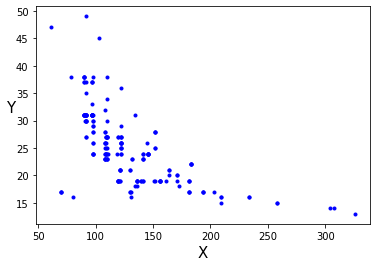

In [172]:
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=15); plt.ylabel("Y", rotation=0, fontsize=15)
plt.show()

In [174]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [175]:
print("For y = mx + b, our linear model predicts m =", str(lin_reg.coef_).lstrip('[').rstrip(']'),"and b =",str(lin_reg.intercept_).lstrip('[').rstrip(']'))

For y = mx + b, our linear model predicts m = -0.10269083 and b = 38.2517297


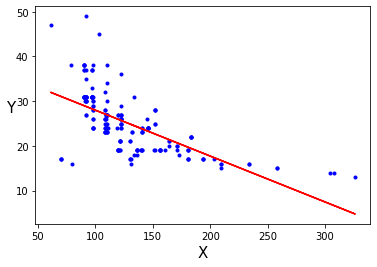

In [176]:
plt.plot(X, y, "b.")
plt.plot(X, (lin_reg.coef_)*X + lin_reg.intercept_ ,"r-")
plt.xlabel("X", fontsize=15); plt.ylabel("Y", rotation=0, fontsize=15)
plt.show()

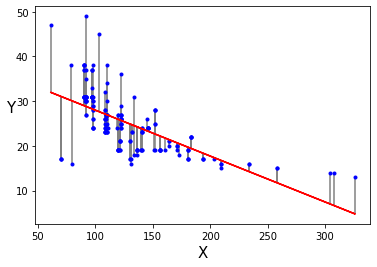

In [177]:
plt.plot(X, y, "b."); plt.plot(X, (lin_reg.coef_)*X + lin_reg.intercept_ ,"r-")
plt.vlines(X,y,(lin_reg.coef_)*X + lin_reg.intercept_,colors='grey')
plt.xlabel("X", fontsize=15); plt.ylabel("Y", rotation=0, fontsize=15)
plt.show()

In [178]:
Xnew = np.array([300,]); Xnew = Xnew.reshape(-1,1)

In [179]:
lin_reg.predict(Xnew)

array([[7.44448122]])

make	fuel-type	aspiration	num-of-doors	body-style	drive-wheels	engine-location	wheel-base	length	width	...	engine-size	fuel-system	bore	stroke	compression-ratio	horsepower	peak-rpm	city-mpg	highway-mpg	price

In [156]:
#Select data for modeling
autos = autoDF.drop(['body-style','make','fuel-type','aspiration','engine-location','num-of-doors','drive-wheels','engine-type','num-of-cylinders','fuel-system'], axis = 1)

autos = autos[autos.bore != '?']
autos['bore'] = autos['bore'].astype('float')

autos = autos[autos.stroke != '?']
autos['stroke'] = autos['stroke'].astype('float')

autos = autos[autos.price != '?']
autos['price'] = autos['price'].astype('float')

autos = autos[autos['peak-rpm'] != '?']
autos['peak-rpm'] = autos['peak-rpm'].astype('float')

y = autos['city-mpg'].copy()
autos = autos.drop(['city-mpg','highway-mpg'], axis = 1)

In [157]:
autos

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000.0,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500.0,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400.0,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300.0,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500.0,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800.0,22470.0


In [158]:
lin_reg.fit(autos, y)

LinearRegression()

In [165]:
Xnew = np.array([88.6,	168.8,	64.1,	48.8,	2548,	130,	3.47,	2.68,	9.0,	300,	5000.0,	13495.0]); Xnew = Xnew.reshape(-1,12)
lin_reg.predict(Xnew)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([12.1607569])

<font color=blue size=4>Let's create some data using the equation y = 1/2 X + 1</font>

In [ ]:
X = np.random.rand(80, 1) * 10
y = (1/2)*X + 2 

noise = np.random.uniform(-2, 2,(80,1))
y = y + noise

<font color=blue size=4>That looks like this</font>

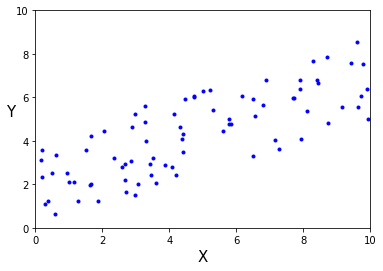

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=15); plt.ylabel("Y", rotation=0, fontsize=15)
plt.axis([0, 10, 0, 10])
plt.show()

<font color=blue size=4>We want to train a linear model to "fit" the data</font>

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

<font color=blue size=4>Recall the equation that we used to create our test data was y = (1/2)*X + 2 
</font>


In [ ]:
print("For y = mx + b, our linear model predicts m =", str(lin_reg.coef_).lstrip('[').rstrip(']'),"and b =",str(lin_reg.intercept_).lstrip('[').rstrip(']'))

For y = mx + b, our linear model predicts m = 0.5054564 and b = 1.91485666


<font color=blue size=4>Any questions so far?<br><br>
Now we add the regression line to our data points. That's it! </font>

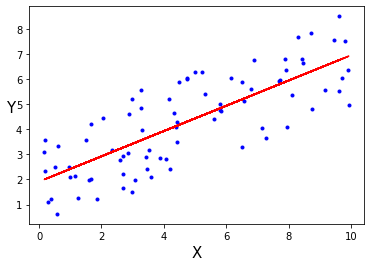

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X, (lin_reg.coef_)*X + lin_reg.intercept_ ,"r-")
plt.xlabel("X", fontsize=15); plt.ylabel("Y", rotation=0, fontsize=15)
plt.show()

<font color=blue size=4>Let's look at the error.</font>

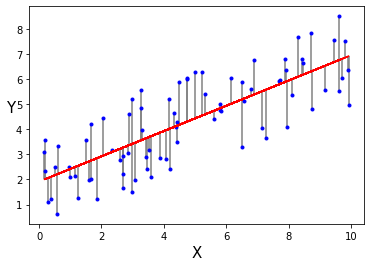

In [ ]:
plt.plot(X, y, "b."); plt.plot(X, (lin_reg.coef_)*X + lin_reg.intercept_ ,"r-")
plt.vlines(X,y,(lin_reg.coef_)*X + lin_reg.intercept_,colors='grey')
plt.xlabel("X", fontsize=15); plt.ylabel("Y", rotation=0, fontsize=15)
plt.show()

<font color=blue size=4>Our model minimizes the error between our data and our line. <br>This is "just math" where we can use the below calculation</font>

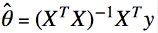

<font color=blue size=4>Now lets take it up a notch and perform Polynomial Regression!<br>
Again, we create some (new) data
</font>

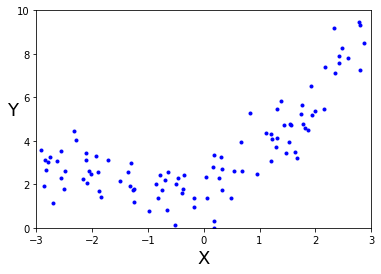

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18); plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

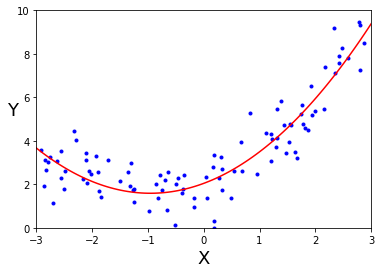

In [ ]:
#Add a squared term and then train our ploynomial linear regression model
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) 
lin_reg.fit(X_poly, y)

#Create a new set of points to plot our line using our model coefficients 
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt.xlabel("X", fontsize=18); plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

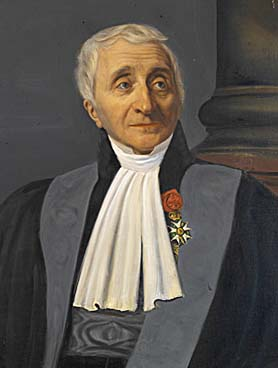

<font color=blue size=4>Polynomial regression was created shortly after the development of regression itself in a paper by Gergonne in 1815.<font>

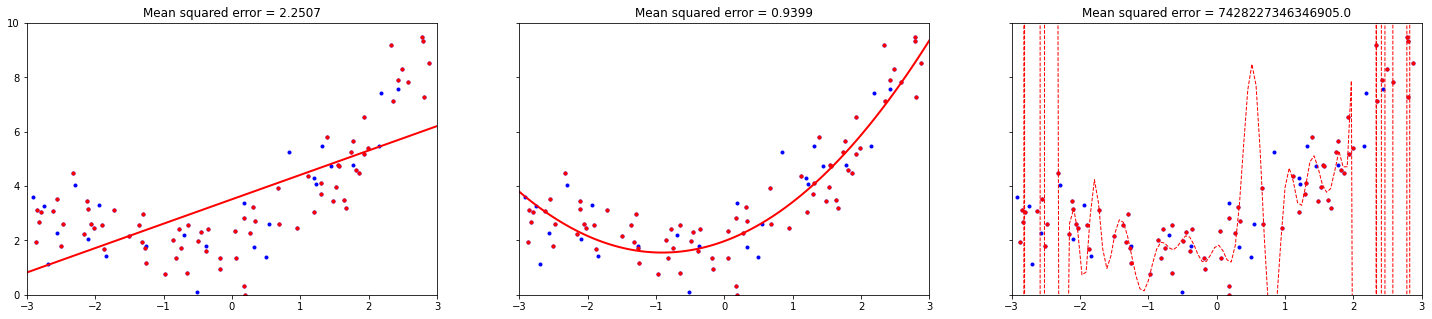

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 75/25 split
fig, ax = plt.subplots(1,3, figsize=(25, 5),sharey='row'); i = 0

for style, width, degree in (("r", 2, 1), ("r", 2, 2),("r--", 1, 100)):
    lin_reg = LinearRegression()
    std_scaler = StandardScaler(); polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    polynomial_regression = Pipeline([("1", polybig_features),("2", std_scaler),("3", lin_reg),])
    polynomial_regression.fit(X_train, y_train)
    y_pred = polynomial_regression.predict(X_test)
    #print("Mean squared error", mean_squared_error(y_test,y_pred),"(the smaller the better).","R-squared variation", r2_score(y_test,y_pred),"(the bigger the better)")
    
    y_new = polynomial_regression.predict(X_new)
    ax[i].axis([-3, 3, 0, 10])
    ax[i].title.set_text("Mean squared error = " + str(round(mean_squared_error(y_test,y_pred),4)))
    ax[i].plot(X, y, "b.", linewidth=3)
    ax[i].plot(X_train, y_train, "r.", linewidth=3)
    ax[i].plot(X_new, y_new, style, label=str(degree), linewidth=width)
    i = i + 1

plt.show()

When moving from linear to polynomial we reduced the error by over a half! On the far right we overfit the data where we closely model the training data only to predict poorly on the test data not seen during training. Key is to reduce the complexity of the model and/or add more data. 

<font color = "blue" size="6"><b>Regression. With housing prices...</b></font>

In [ ]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sklearn_housing_bunch = fetch_california_housing();
housingDF = pd.DataFrame(sklearn_housing_bunch.data,columns=sklearn_housing_bunch.feature_names)
housingDF['MedHouseVal'] = sklearn_housing_bunch.target; housingDF

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


No handles with labels found to put in legend.


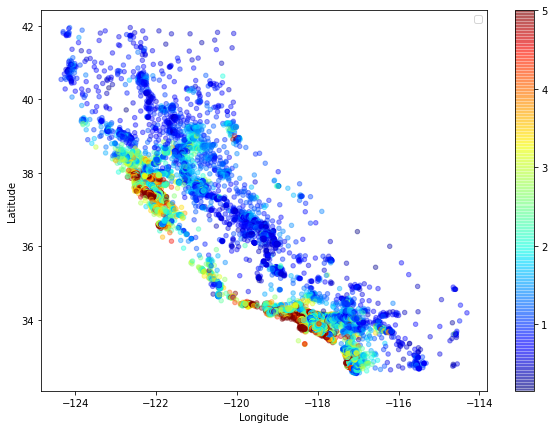

In [ ]:
housingDF.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, #s=housingDF["Population"]/100, label="Population", 
    figsize=(10,7), c=y, cmap=plt.get_cmap("jet"), colorbar=True, sharex=False); plt.legend()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse * 100000

73512.77481981681

<font color = "blue" size=4> 
Two ways to address underfitting and improve results:
1.   Feed "better" data into the model (more, cleaner, new features, scaled, ...)
2.   Select a more powerful machine learning model

</font>

Text(0, 0.5, 'Median House Value')

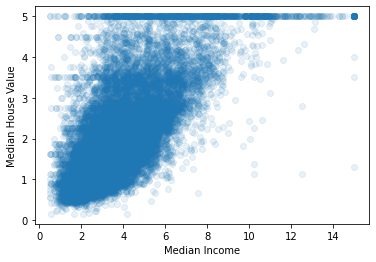

In [ ]:
plt.scatter(X[:,0], y, alpha = 0.1); plt.xlabel("Median Income"); plt.ylabel("Median House Value")

...<font color="white">can see an upward trend as (x) income goes up, (y) house value goes up. note the lines at 3.5 and 5 that we might want to remove so as to not learn a potentiall side effect. Can add household based features, can do regression on city level using lat and long. ...</font>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
housing_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse * 100000

52238.56663624892

<font color = "blue" size="6"><b><i>What questions might you have on regression <br> or building a machine learning model?</b></font></i>

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
import xgboost

XGBmodel = xgboost.XGBClassifier().fit(X_train, y_train)

In [ ]:
housing_predictions = XGBmodel.predict(X_test)

XGB_rmse = mean_squared_error(y_test, housing_predictions)
XGB_rmse = np.sqrt(XGB_rmse)
XGB_rmse * 100000

102684.09712504773

In [ ]:
import shap

explainer = shap.Explainer(XGBmodel)
shap_values = explainer(X_frame)

shap.plots.waterfall(shap_values[0]) #Visualize the contribution of each feature to the first prediction

ModuleNotFoundError: ignored

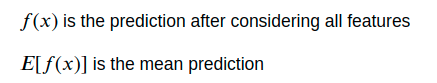

In [ ]:
shap.plots.waterfall(shap_values[1]) #Visualize the second prediction’s explanation

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.scatter(shap_values[:, "daily_internet_usage"])


In [ ]:
shap.plots.scatter(shap_values[:, "daily_internet_usage"], color=shap_values)


In [ ]:
shap.plots.scatter(shap_values[:, "daily_time_spent_on_site"], color=shap_values)


In [ ]:
housingDF.describe()

In [ ]:
housingDF.info()

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(housingDF)

In [ ]:
housingDF.hist(bins=50, figsize=(20, 15))


In [ ]:
pd.Series(forest_reg.feature_importances_, index=list(housingDF.columns[0:8])).nlargest(4).plot(kind='barh',figsize=(8, 6))

In [ ]:
from numpy.polynomial.polynomial import polyfit

# Let's look at Nappa https://www.kaggle.com/camnugent/california-housing-feature-engineering
cityDF = housingDF[housingDF['Latitude'].between(38.30,39.31) & housingDF['Longitude'].between(-123.3,-122.26)] 
b, m = polyfit(cityDF.MedInc, cityDF.MedHouseVal, 1)
plt.plot(cityDF.MedInc, b + m * cityDF.MedInc, 'r-','-')
plt.plot(cityDF.MedInc, cityDF.MedHouseVal, "b.")
plt.show()

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig); ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z'); 
ax.scatter(cityDF.MedInc, cityDF.AveRooms, cityDF.MedHouseVal, c=cityDF.MedHouseVal, edgecolor='k', s=40) #  cmap=plt.cm.Set1 ... elev=-150, azim=220

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30)
plt.show()

In [ ]:
corr_matrix = housingDF.corr()
corr_matrix["MedHouseVal"].sort_values(ascending=False)

In [ ]:
correlation= housingDF.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='1.4f', annot=True, annot_kws={'size':10})

In [ ]:
sns.scatterplot(data=housingDF, x="MedInc", y="MedHouseVal",alpha =.1)

In [ ]:
housingDF.plot(kind="scatter", x="MedInc", y="MedHouseVal", alpha=0.1)

In [ ]:
sns.regplot(data=housingDF, x="MedInc", y="MedHouseVal", line_kws={"color": "red"}, scatter_kws={"alpha":0.1})

perhaps some additional feature engineering would be helpful such as ...

In [ ]:
sns.scatterplot(housingDF['Longitude'],housingDF['Latitude'], c=y, cmap = plt.get_cmap("jet"), alpha =.4,)

In [ ]:
from sklearn.tree import DecisionTreeRegressor # actually does worse! 

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae


In [ ]:
from sklearn.inspection import plot_partial_dependence
features = ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms']
est = LinearRegression()
est.fit(X_train, y_train)
est.score(X_test, y_test, sample_weight=None)

In [ ]:
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0, 
           min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
forest_reg.fit(X_train, y_train)
housing_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse * 100000


In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0, 
           min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
forest_reg.fit(X_train, y_train)
housing_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


Do some transforming of data...

In [ ]:
sample_incomplete_rows = housingDF[housingDF.isnull().any(axis=1)].head()
sample_incomplete_rows


In [ ]:
#train_x = train_set.drop("MedHouseVal", axis=1) # drop labels for training set
#test_y = test_set["median_house_value"].copy()

In [ ]:
#ahousingDF = housingDF.copy()
#ahousingDF["rooms_per_household"] = ahousingDF["total_rooms"]/ahousingDF["households"]
#ahousingDF["bedrooms_per_room"] = ahousingDF["total_bedrooms"]/ahousingDF["total_rooms"]
#ahousingDF["population_per_household"]=ahousingDF["population"]/ahousingDF["households"]

Interesting to think of relationships with the info...

In [ ]:
print("Our linear model predicts  =", str(lin_reg.coef_).lstrip('[').rstrip(']'),"and b =",str(lin_reg.intercept_).lstrip('[').rstrip(']'),"\n")
#lin_reg.fit(X_poly, y)
#plt.plot(np.sort(X,axis=0), (lin_reg.coef_[:,0])*X**2 + (lin_reg.coef_[:,1])*X + lin_reg.intercept_, "g-")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 75/25 split

X_test = np.sort(X_test,axis=0)
lin_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg.fit(X_poly, y_train)

X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_test, y_new, "r-")
plt.xlabel("X", fontsize=18); plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
x_y_points = np.concatenate((X_test,X_new[0:25,:]),axis = 1); print(x_y_points)
plt.plot(X_test, y_new, "r-")
x_y_points.shape

In [ ]:
from sklearn.preprocessing import StandardScaler; from sklearn.pipeline import Pipeline

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2),("g-", 1, 300) ):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([("poly_features", polybig_features),("std_scaler", std_scaler),("lin_reg", lin_reg),])
    polynomial_regression.fit(X, y)
    #y_newbig = polynomial_regression.predict(X_new)
    plt.axis([-3, 3, 0, 10])
    plt.plot(X, y, "b.", linewidth=3)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    plt.show()



In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [ ]:
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [ ]:
!ls ./datasets/housing

In [ ]:
housing = load_housing_data()
housing.head()

In [ ]:
housing.describe()

In [ ]:
housingDF.describe()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.model_selection import train_test_split

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

def plot_linear_regression_wave():
    X, y = make_wave(n_samples=60)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    line = np.linspace(-3, 3, 100).reshape(-1, 1)

    lr = LinearRegression().fit(X_train, y_train)
    print("w[0]: %f  b: %f" % (lr.coef_[0], lr.intercept_))

    plt.figure(figsize=(8, 8))
    plt.plot(line, lr.predict(line))
    plt.plot(X, y, 'o')
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.set_ylim(-3, 3)
    #ax.set_xlabel("Feature")
    #ax.set_ylabel("Target")
    ax.legend(["model", "training data"], loc="best")
    ax.grid(True)
    ax.set_aspect('equal')

plot_linear_regression_wave()

In [ ]:
from matplotlib.collections import LineCollection # https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.plot(x, y, 'C0.', markersize=12)
ax0.plot(x, y_, 'C1.-', markersize=12)
ax0.plot(x, lr.predict(x[:, np.newaxis]), 'C2-')
ax0.add_collection(lc)
ax0.legend(('Training data', 'Isotonic fit', 'Linear fit'), loc='lower right')
ax0.set_title('Isotonic regression fit on noisy data (n=%d)' % n)

x_test = np.linspace(-10, 110, 1000)
ax1.plot(x_test, ir.predict(x_test), 'C1-')
#ax1.plot(ir.X_thresholds_, ir.y_thresholds_, 'C1.', markersize=12)
#ax1.set_title("Prediction function (%d thresholds)" % len(ir.X_thresholds_))

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#fig, ax = plt.subplots(1, 3)
i = 0

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([("poly_features", polybig_features),("std_scaler", std_scaler),("lin_reg", lin_reg),])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    i = i + 1
    plt.show()

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [ ]:
housingDF.loc[1:100,]

In [ ]:
x_y_points = np.concatenate((X,y),axis = 1); print(x_y_points[0:10,])

Note that parts of the below notebook have been sourced from 

---

https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb


https://gist.github.com/machinelearning-blog/76b50b18c7db3408646cc8d18c50c20b